In [1]:
# ## install required packages
# !pip install swig
# !pip install wrds
# !pip install pyportfolioopt
# ## install finrl library
# !pip install -q condacolab
# import condacolab
# condacolab.install()
# !apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
# !pip install git+https://github.com/skazgor/FinRL.git

In [2]:
import pandas as pd
import json
import os 
import sys

# plot
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# dir = os.path.join('dataset', 'kaggle-dse')
dir = r"/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models/datasets/kaggle-dse"

files = os.listdir(dir)
files.sort()
files = [f for f in files if f not in ['securities.json', 'prices_2008.json']]
print(files)

['prices_2009.json', 'prices_2010.json', 'prices_2011.json', 'prices_2012.json', 'prices_2013.json', 'prices_2014.json', 'prices_2015.json', 'prices_2016.json', 'prices_2017.json', 'prices_2018.json', 'prices_2019.json', 'prices_2020.json', 'prices_2021.json', 'prices_2022.json']


In [4]:
# load all the json files
data = []
for f in files:
    with open(os.path.join(dir, f)) as file:
        data.append(json.load(file))
len(data)

14

In [5]:
# convert to pandas dataframe
dfs = []
for i in range(1,len(data)):
    dfs.append(pd.DataFrame(data[i]))
df = pd.concat(dfs)

In [6]:
df.shape

(1612197, 11)

In [7]:
df.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,2010-12-30 00:00:00,1JANATAMF,12.9,13.9,12.3,12.3,13.0,12.0,4708,124.8680,9623500
1,2010-12-29 00:00:00,1JANATAMF,11.8,12.3,11.2,11.7,12.0,11.3,1680,46.8126,3987000
2,2010-12-28 00:00:00,1JANATAMF,11.3,11.7,11.0,11.0,11.3,11.2,1077,19.3689,1698500
3,2010-12-27 00:00:00,1JANATAMF,11.3,11.5,11.0,11.5,11.2,11.4,932,13.9884,1249000
4,2010-12-26 00:00:00,1JANATAMF,11.6,11.8,11.2,11.6,11.4,11.5,1671,31.8171,2746500


In [8]:
# count the unique values in the column
df = df.drop_duplicates(subset=['date', 'trading_code'])
print(df['trading_code'].value_counts())

trading_code
GP            3090
SANDHANINS    3090
ICBIBANK      3090
SAMORITA      3090
IDLC          3090
              ... 
TB2Y1024        40
GIB             31
TB5Y1127        11
IICICL          11
ICICL            9
Name: count, Length: 954, dtype: int64


In [9]:
top_companies = [
    "GP",
    "BATBC",
    "SQURPHARMA",
    "BEXIMCO",
    "BERGERPBL",
    "MARICO",
    "BRACBANK",
    "BXPHARMA",
    "ISLAMIBANK",
    "DUTCHBANGL",
    "EBL",
    "POWERGRID",
    "SUMITPOWER",
    "OLYMPIC",
    "PUBALIBANK",
    "CITYBANK",
    "ALARABANK",
    "PRIMEBANK",
    "IFIC",
    "RECKITTBEN",
    "NBL",
    "BSRMSTEEL",
    "BANKASIA",
    "SHAHJABANK",
    "MPETROLEUM",
    "LINDEBD",
    "BSC",
    "JAMUNAOIL",
    "PADMAOIL",
    "SINGERBD",
    "ACI",
    "IBNSINA",
    "HRTEX",
    "SOUTHEASTB",
    "APEXFOODS",
    "SALAMCRST",
    "FEDERALINS",
    "DESCO",
    "BATASHOE",
]

len(top_companies)

39

In [10]:
new_df = df[df['trading_code'].isin(top_companies)]

new_df['date'].value_counts()

date
2010-12-30 00:00:00    39
2018-07-17 00:00:00    39
2018-06-05 00:00:00    39
2018-06-04 00:00:00    39
2018-06-03 00:00:00    39
                       ..
2014-08-24 00:00:00    39
2014-08-21 00:00:00    39
2014-08-20 00:00:00    39
2014-08-19 00:00:00    39
2022-01-02 00:00:00    39
Name: count, Length: 3090, dtype: int64

In [11]:
new_df['trading_code'].value_counts()

trading_code
ACI           3090
POWERGRID     3090
JAMUNAOIL     3090
LINDEBD       3090
MARICO        3090
MPETROLEUM    3090
NBL           3090
OLYMPIC       3090
PADMAOIL      3090
PRIMEBANK     3090
IFIC          3090
PUBALIBANK    3090
RECKITTBEN    3090
SALAMCRST     3090
SHAHJABANK    3090
SINGERBD      3090
SOUTHEASTB    3090
SQURPHARMA    3090
ISLAMIBANK    3090
IBNSINA       3090
ALARABANK     3090
BSC           3090
APEXFOODS     3090
BANKASIA      3090
BATASHOE      3090
BATBC         3090
BERGERPBL     3090
BEXIMCO       3090
BRACBANK      3090
BSRMSTEEL     3090
HRTEX         3090
BXPHARMA      3090
CITYBANK      3090
DESCO         3090
DUTCHBANGL    3090
EBL           3090
FEDERALINS    3090
GP            3090
SUMITPOWER    3090
Name: count, dtype: int64

In [12]:
df = new_df

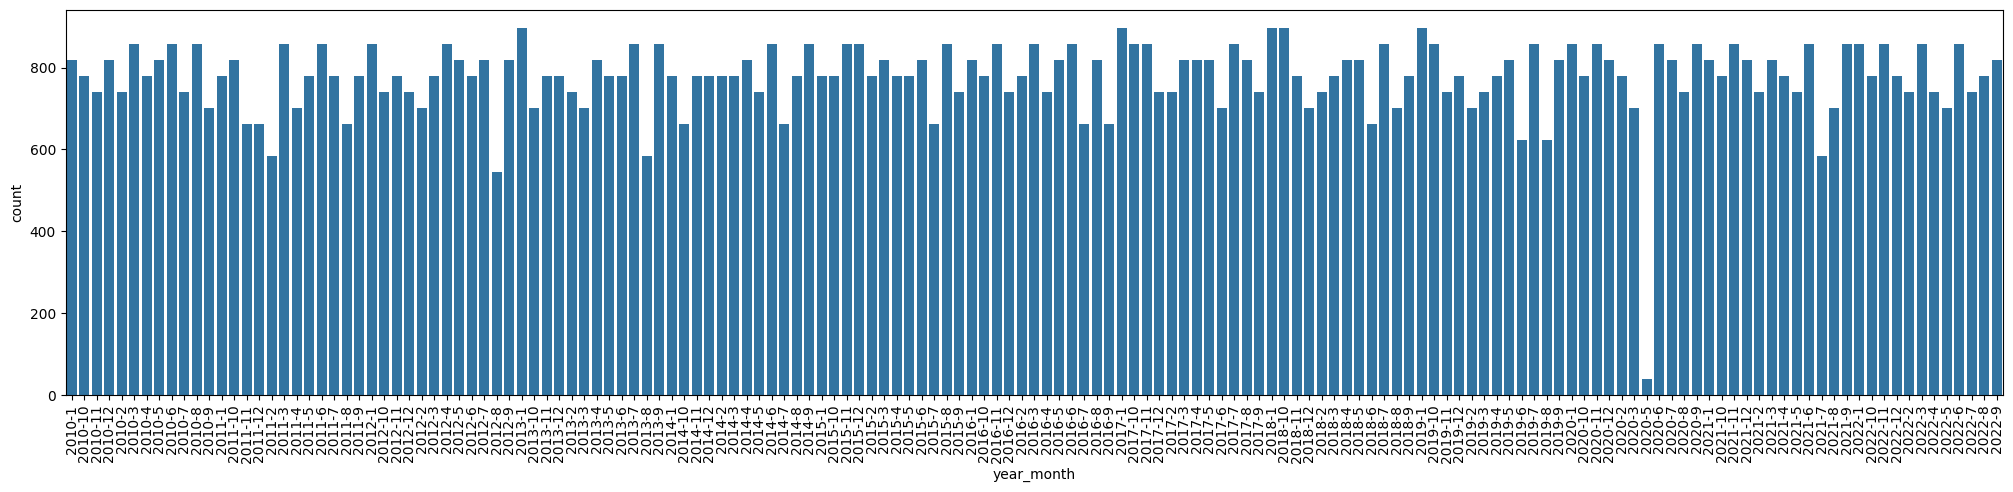

In [13]:
# per year minimum number of trading days
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a new column 'year_month' for plotting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

plt.figure(figsize=(25, 5))
sns.countplot(x='year_month', data=df, order=sorted(df['year_month'].unique()))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [14]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1762
high                        1762
low                         1762
opening_price                717
closing_price                 36
yesterdays_closing_price       0
trade                       1765
value_mn                    1813
volume                      1765
year                           0
month                          0
year_month                     0
dtype: int64


In [15]:
# Calculate the mean values of each month for the columns high, low, opening, and closing
# mean_values = df.groupby(['year', 'month', 'trading_code'])[['high', 'low', 'opening', 'closing']].mean()
# Replace the zero values with the mean values
new_df = df.copy()
new_df[['high', 'low', 'opening_price', 'closing_price']] = \
        new_df.groupby(['year', 'month', 'trading_code'])[['high', 'low', 'opening_price', 'closing_price']].transform(lambda x: x.replace(0, x.mean()))

# Verify the changes
# print the zero count of each column
zero_counts = new_df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1762
high                         312
low                          312
opening_price                 17
closing_price                  0
yesterdays_closing_price       0
trade                       1765
value_mn                    1813
volume                      1765
year                           0
month                          0
year_month                     0
dtype: int64


In [16]:
new_df[['high', 'low', 'opening_price', 'closing_price']] = \
        new_df.groupby(['year', 'trading_code'])[['high', 'low', 'opening_price', 'closing_price']].transform(lambda x: x.replace(0, x.mean()))

# Verify the changes
# print the zero count of each column
zero_counts = new_df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1762
high                           0
low                            0
opening_price                  0
closing_price                  0
yesterdays_closing_price       0
trade                       1765
value_mn                    1813
volume                      1765
year                           0
month                          0
year_month                     0
dtype: int64


In [17]:
df = new_df.copy()

In [18]:
df['year'].value_counts()

year
2017    9672
2010    9516
2015    9516
2022    9516
2018    9438
2016    9399
2021    9360
2013    9282
2014    9282
2012    9243
2019    9243
2011    8931
2020    8112
Name: count, dtype: int64

In [19]:
df['trading_code'].value_counts()

trading_code
ACI           3090
POWERGRID     3090
JAMUNAOIL     3090
LINDEBD       3090
MARICO        3090
MPETROLEUM    3090
NBL           3090
OLYMPIC       3090
PADMAOIL      3090
PRIMEBANK     3090
IFIC          3090
PUBALIBANK    3090
RECKITTBEN    3090
SALAMCRST     3090
SHAHJABANK    3090
SINGERBD      3090
SOUTHEASTB    3090
SQURPHARMA    3090
ISLAMIBANK    3090
IBNSINA       3090
ALARABANK     3090
BSC           3090
APEXFOODS     3090
BANKASIA      3090
BATASHOE      3090
BATBC         3090
BERGERPBL     3090
BEXIMCO       3090
BRACBANK      3090
BSRMSTEEL     3090
HRTEX         3090
BXPHARMA      3090
CITYBANK      3090
DESCO         3090
DUTCHBANGL    3090
EBL           3090
FEDERALINS    3090
GP            3090
SUMITPOWER    3090
Name: count, dtype: int64

The goal is to:
Sample 208 unique days for each year in the dataset.
Ensure that for each sampled day, data is available for all 30 trading codes (stocks or financial instruments).
Combine the sampled data into a final dataset.

In [20]:
# df['date'] = pd.to_datetime(df['date'])

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by year
grouped_data = df.groupby('year')

# Sample 200 days for each year
for year, group in grouped_data:
    # Sample 200 unique days
    for t, g in group.groupby('trading_code'):
        sampled_days = g['date'].sample(208, replace=False)
        break
    # check the number of unique days
    print(len(sampled_days.unique()))
    
    # Filter the data for the sampled days
    sampled_year_data = group[group['date'].isin(sampled_days)]
    # print(len(sampled_year_data))
    
    # Ensure each sampled day includes all 30 trading codes
    sampled_year_data = sampled_year_data.groupby('date').filter(lambda x: len(x) == 30)
    
    # Append the sampled data to the final DataFrame
    sampled_data = pd.concat([sampled_data, sampled_year_data])

# Reset index of the final sampled data
sampled_data.reset_index(drop=True, inplace=True)

208
208
208
208
208
208
208
208
208
208
208
208
208


In [21]:
sampled_data['year'].value_counts()

Series([], Name: count, dtype: int64)

In [22]:

# change the zero values of the columns volume to hundred
df['volume'] = df['volume'].replace(0, 100)

In [23]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1762
high                           0
low                            0
opening_price                  0
closing_price                  0
yesterdays_closing_price       0
trade                       1765
value_mn                    1813
volume                         0
year                           0
month                          0
year_month                     0
dtype: int64


In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/ml/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [25]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [26]:
df.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,year,month,year_month
2777,2010-12-30,ACI,373.5,374.0,368.0,368.0,372.6,372.5,135,6.5451,17600,2010,12,2010-12
2778,2010-12-29,ACI,373.0,377.8,369.0,377.8,372.5,373.2,87,2.8799,7750,2010,12,2010-12
2779,2010-12-28,ACI,373.2,375.0,367.3,374.9,373.2,366.7,167,6.9818,18750,2010,12,2010-12
2780,2010-12-27,ACI,367.0,370.0,365.7,369.9,366.7,367.6,130,4.7619,12950,2010,12,2010-12
2781,2010-12-26,ACI,369.9,371.0,365.0,365.3,367.6,367.9,117,3.9473,10700,2010,12,2010-12


In [27]:
df.drop(['year_month', 'last_traded_price', 'trade', 'value_mn','yesterdays_closing_price','month','year'], axis=1, inplace=True)
df.rename(columns={'trading_code': 'tic', 'opening_price': 'open', 'closing_price': 'close'}, inplace=True)
df.head()

,date,tic,high,low,open,close,volume
2777,2010-12-30,ACI,374.0,368.0,368.0,372.6,17600
2778,2010-12-29,ACI,377.8,369.0,377.8,372.5,7750
2779,2010-12-28,ACI,375.0,367.3,374.9,373.2,18750
2780,2010-12-27,ACI,370.0,365.7,369.9,366.7,12950
2781,2010-12-26,ACI,371.0,365.0,365.3,367.6,10700


In [28]:
# Assuming 'df' is your DataFrame and 'close' is the column with closing prices
std_dev = df.groupby('tic')['close'].std()

plt.figure(figsize=(10,6))
sns.histplot(std_dev, bins=50, kde=True)
plt.title('Distribution of std of the stocks')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.savefig('output.png')
plt.show()

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_31111/2605565239.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [29]:
df['day'] = pd.to_datetime(df['date']).dt.dayofweek
df['short_resistance']= df['high'].rolling(window=10,min_periods=0).max()
df['short_support']= df['low'].rolling(window=10,min_periods=0).min()
df['long_resistance']= df['high'].rolling(window=50,min_periods=0).max()
df['long_support']= df['low'].rolling(window=50,min_periods=0).min()
df = df.reset_index(drop=True)
df = df.sort_values(by=['date','tic']).reset_index(drop=True)

In [30]:
df.dtypes

date                datetime64[ns]
tic                         object
high                       float64
low                        float64
open                       float64
close                      float64
volume                       int64
day                          int32
short_resistance           float64
short_support              float64
long_resistance            float64
long_support               float64
dtype: object

In [31]:
# convert datetime to string
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [32]:
print(df.shape)
df.head()

(120510, 12)


,date,tic,high,low,open,close,volume,day,short_resistance,short_support,long_resistance,long_support
0,2010-01-03,ACI,449.90,444.00,449.9,446.50,91550,6,528.0,444.0,544.0,444.000000
1,2010-01-03,ALARABANK,530.00,516.00,530.0,522.25,128350,6,532.0,502.0,614.0,493.534091
2,2010-01-03,APEXFOODS,1239.00,1170.25,1239.0,1189.75,225,6,1355.0,1170.0,1355.0,1002.000000
3,2010-01-03,BANKASIA,459.75,437.00,437.0,452.00,298550,6,495.0,431.0,590.0,431.000000
4,2010-01-03,BATASHOE,534.90,518.00,527.0,524.40,39500,6,624.0,510.0,659.9,510.000000


In [33]:
data = df.copy()
df_price_pivot = data.pivot(index="date", columns="tic", values="close")
df_price_pivot = df_price_pivot.pct_change()
unique_date = data.date.unique()
# start after a year
start = 208
turbulence_index = [0] * start
# turbulence_index = [0]
count = 0
for i in range(start, len(unique_date)):
  current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
  # use one year rolling window to calcualte covariance
  hist_price = df_price_pivot[
      (df_price_pivot.index < unique_date[i])
      & (df_price_pivot.index >= unique_date[i - 208])
  ]
  # Drop tickers which has number missing values more than the "oldest" ticker
  filtered_hist_price = hist_price.iloc[
      hist_price.isna().sum().min() :
  ].dropna(axis=1)

  cov_temp = filtered_hist_price.cov()
  current_temp = current_price[[x for x in filtered_hist_price]] - np.mean(
      filtered_hist_price, axis=0
  )
  # cov_temp = hist_price.cov()
  # current_temp=(current_price - np.mean(hist_price,axis=0))

  temp = current_temp.values.dot(np.linalg.pinv(cov_temp)).dot(
      current_temp.values.T
  )
  if temp > 0:
      count += 1
      if count > 2:
          turbulence_temp = temp[0][0]
      else:
          # avoid large outlier because of the calculation just begins
          turbulence_temp = 0
  else:
      turbulence_temp = 0
  turbulence_index.append(turbulence_temp)
print(len(turbulence_index))
try:
  turbulence_index = pd.DataFrame(
      {"date": df_price_pivot.index, "turbulence": turbulence_index}
  )
except ValueError:
  raise Exception("Turbulence information could not be added.")

3090


In [34]:
turbulence_index['turbulence'].max()

12007.362114149953

In [35]:
df = df.merge(turbulence_index, on="date")
df['tic'].value_counts()

tic
ACI           3090
POWERGRID     3090
JAMUNAOIL     3090
LINDEBD       3090
MARICO        3090
MPETROLEUM    3090
NBL           3090
OLYMPIC       3090
PADMAOIL      3090
PRIMEBANK     3090
IFIC          3090
PUBALIBANK    3090
RECKITTBEN    3090
SALAMCRST     3090
SHAHJABANK    3090
SINGERBD      3090
SOUTHEASTB    3090
SQURPHARMA    3090
ISLAMIBANK    3090
IBNSINA       3090
ALARABANK     3090
BSC           3090
APEXFOODS     3090
BANKASIA      3090
BATASHOE      3090
BATBC         3090
BERGERPBL     3090
BEXIMCO       3090
BRACBANK      3090
BSRMSTEEL     3090
HRTEX         3090
BXPHARMA      3090
CITYBANK      3090
DESCO         3090
DUTCHBANGL    3090
EBL           3090
FEDERALINS    3090
GP            3090
SUMITPOWER    3090
Name: count, dtype: int64

In [36]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=False,
                    use_turbulence=False,
                    user_defined_feature = False)
# turbulance is giving error
df = df.fillna(value = 0)
processed = fe.preprocess_data(df)

Successfully added technical indicators


In [37]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [38]:
print(processed_full.shape)
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

(120510, 21)


,date,tic,high,low,open,close,volume,day,short_resistance,short_support,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2010-01-03,ACI,449.90000,444.000000,449.9,446.50,91550.0,6.0,528.0,444.000000,...,444.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,446.50,446.50
1,2010-01-03,ALARABANK,530.00000,516.000000,530.0,522.25,128350.0,6.0,532.0,502.000000,...,493.534091,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,522.25,522.25
2,2010-01-03,APEXFOODS,1239.00000,1170.250000,1239.0,1189.75,225.0,6.0,1355.0,1170.000000,...,1002.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,1189.75,1189.75
3,2010-01-03,BANKASIA,459.75000,437.000000,437.0,452.00,298550.0,6.0,495.0,431.000000,...,431.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,452.00,452.00
4,2010-01-03,BATASHOE,534.90000,518.000000,527.0,524.40,39500.0,6.0,624.0,510.000000,...,510.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,524.40,524.40
5,2010-01-03,BATBC,436.00000,407.600000,414.9,432.10,467500.0,6.0,464.9,407.600000,...,407.600000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,432.10,432.10
6,2010-01-03,BERGERPBL,679.90000,626.000000,639.0,666.80,123850.0,6.0,722.0,626.000000,...,555.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,666.80,666.80
7,2010-01-03,BEXIMCO,321.00000,310.100000,310.1,319.90,2230100.0,6.0,328.7,310.100000,...,310.100000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,319.90,319.90
8,2010-01-03,BRACBANK,705.00000,680.250000,705.0,687.25,199600.0,6.0,773.0,680.250000,...,542.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,687.25,687.25
9,2010-01-03,BSC,1814.22619,1740.761905,5490.0,5490.00,100.0,6.0,5221.0,1740.761905,...,172.727273,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,5490.00,5490.00


In [39]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

In [40]:
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2020-12-31'
TRADE_START_DATE = '2021-01-01'
TRADE_END_DATE = '2022-12-31'
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

101634
18876


In [41]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 39, State Space: 391


In [42]:
buy_cost_list = sell_cost_list = [0.0005] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 2000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
    # "cash_penalty_percentage": 0.1,
    # "exponential_cash_average": 0.04
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [43]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [44]:
agent = DRLAgent(env = env_train)

if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

In [45]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/a2c


In [46]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=5000) if if_using_a2c else None

-------------------------------------
| time/                 |           |
|    fps                | 107       |
|    iterations         | 100       |
|    time_elapsed       | 4         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -55.3     |
|    explained_variance | 0.0125    |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -170      |
|    reward             | 1.5726384 |
|    std                | 0.999     |
|    value_loss         | 9.28      |
-------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 113         |
|    iterations         | 200         |
|    time_elapsed       | 8           |
|    total_timesteps    | 1000        |
| train/                |             |
|    entropy_loss       | -55.4       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007

In [47]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg


In [48]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=1000) if if_using_ddpg else None

In [49]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/ppo


In [50]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=5000) if if_using_ppo else None

-------------------------------------
| time/              |              |
|    fps             | 167          |
|    iterations      | 1            |
|    time_elapsed    | 12           |
|    total_timesteps | 2048         |
| train/             |              |
|    reward          | -0.036112685 |
-------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 167        |
|    iterations           | 2          |
|    time_elapsed         | 24         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.02103943 |
|    clip_fraction        | 0.227      |
|    clip_range           | 0.2        |
|    entropy_loss         | -55.4      |
|    explained_variance   | 0.0216     |
|    learning_rate        | 0.00025    |
|    loss                 | 16.1       |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0319    |
| 

### Agent 4: TD3

In [51]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 100000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 100000, 'learning_rate': 0.001}
Using cpu device
Logging to results/td3


In [52]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=1000) if if_using_td3 else None

### Agent 5: SAC

In [53]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/sac


In [54]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=5000) if if_using_sac else None

In [55]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [56]:
insample_risk_indicator.turbulence.describe()

count     2606.000000
mean        61.873697
std        262.107566
min          0.000000
25%         22.412021
50%         37.679913
75%         60.258365
max      12007.362114
Name: turbulence, dtype: float64

In [57]:
plt.figure(figsize=(10,6))
filtered_turbulence = insample_risk_indicator.turbulence[insample_risk_indicator.turbulence < 600]
sns.histplot(filtered_turbulence, bins=50, kde=True)
plt.title('Distribution of turbulence of DJI top 30 stocks')
plt.xlabel('Turbulence')
plt.ylabel('Frequency')
plt.savefig('turbulenceOFdse.png')
plt.show()

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_31111/455132124.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [58]:
insample_risk_indicator.turbulence.quantile(0.996)

703.372286612938

In [59]:
e_trade_gym = StockTradingEnv(df = trade,  **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [60]:
trade.head()

,date,tic,high,low,open,close,volume,day,short_resistance,short_support,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2021-01-03,ACI,253.8,244.0,246.0,248.7,156284.0,6.0,263.9,244.0,...,236.500000,132.829411,-2.008025,250.869980,237.200020,49.762364,-2.085968,7.186881,249.870000,250.885000
0,2021-01-03,ALARABANK,22.1,21.5,22.1,21.9,1117376.0,6.0,23.6,21.5,...,20.100000,132.829411,0.274896,23.318506,21.361494,57.821012,-33.282905,25.257180,22.146667,20.186667
0,2021-01-03,APEXFOODS,128.9,125.0,125.4,127.2,56507.0,6.0,128.9,120.5,...,113.778947,132.829411,-0.665745,137.981256,121.538744,49.947281,-86.601641,8.777443,131.116667,125.998333
0,2021-01-03,BANKASIA,18.1,17.8,18.0,18.0,286531.0,6.0,19.6,17.8,...,16.200000,132.829411,-0.062325,18.695997,17.844003,47.255202,-117.224880,10.209359,18.246667,18.368333
0,2021-01-03,BATASHOE,715.0,700.0,700.0,707.9,7739.0,6.0,715.0,693.2,...,693.200000,132.829411,2.231834,705.137887,687.082113,61.135809,248.355263,61.238219,695.140000,694.865000


In [61]:
trained_moedl = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

# Save the actions DataFrame to a CSV file
df_actions_a2c.to_csv("actions_a2c.csv", index=True)  # Include index for date information


hit end!


In [62]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
df_actions_ddpg.to_csv("actions_ddpg.csv", index=True)  # Include index for date information



hit end!


In [63]:
trained_moedl = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [64]:
trained_moedl = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [65]:
trained_moedl = trained_sac
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [66]:
# print max of each model
print('A2C:', df_account_value_a2c['account_value'].max())
print('DDPG:', df_account_value_ddpg['account_value'].max())
print('PPO:', df_account_value_ppo['account_value'].max())
print('TD3:', df_account_value_td3['account_value'].max())
print('SAC:', df_account_value_sac['account_value'].max())

A2C: 2687597.482500001
DDPG: 2380779.8022
PPO: 2674514.55155
TD3: 2519671.5004499997
SAC: 2681732.304200001
